## Diccionario de los 2 df

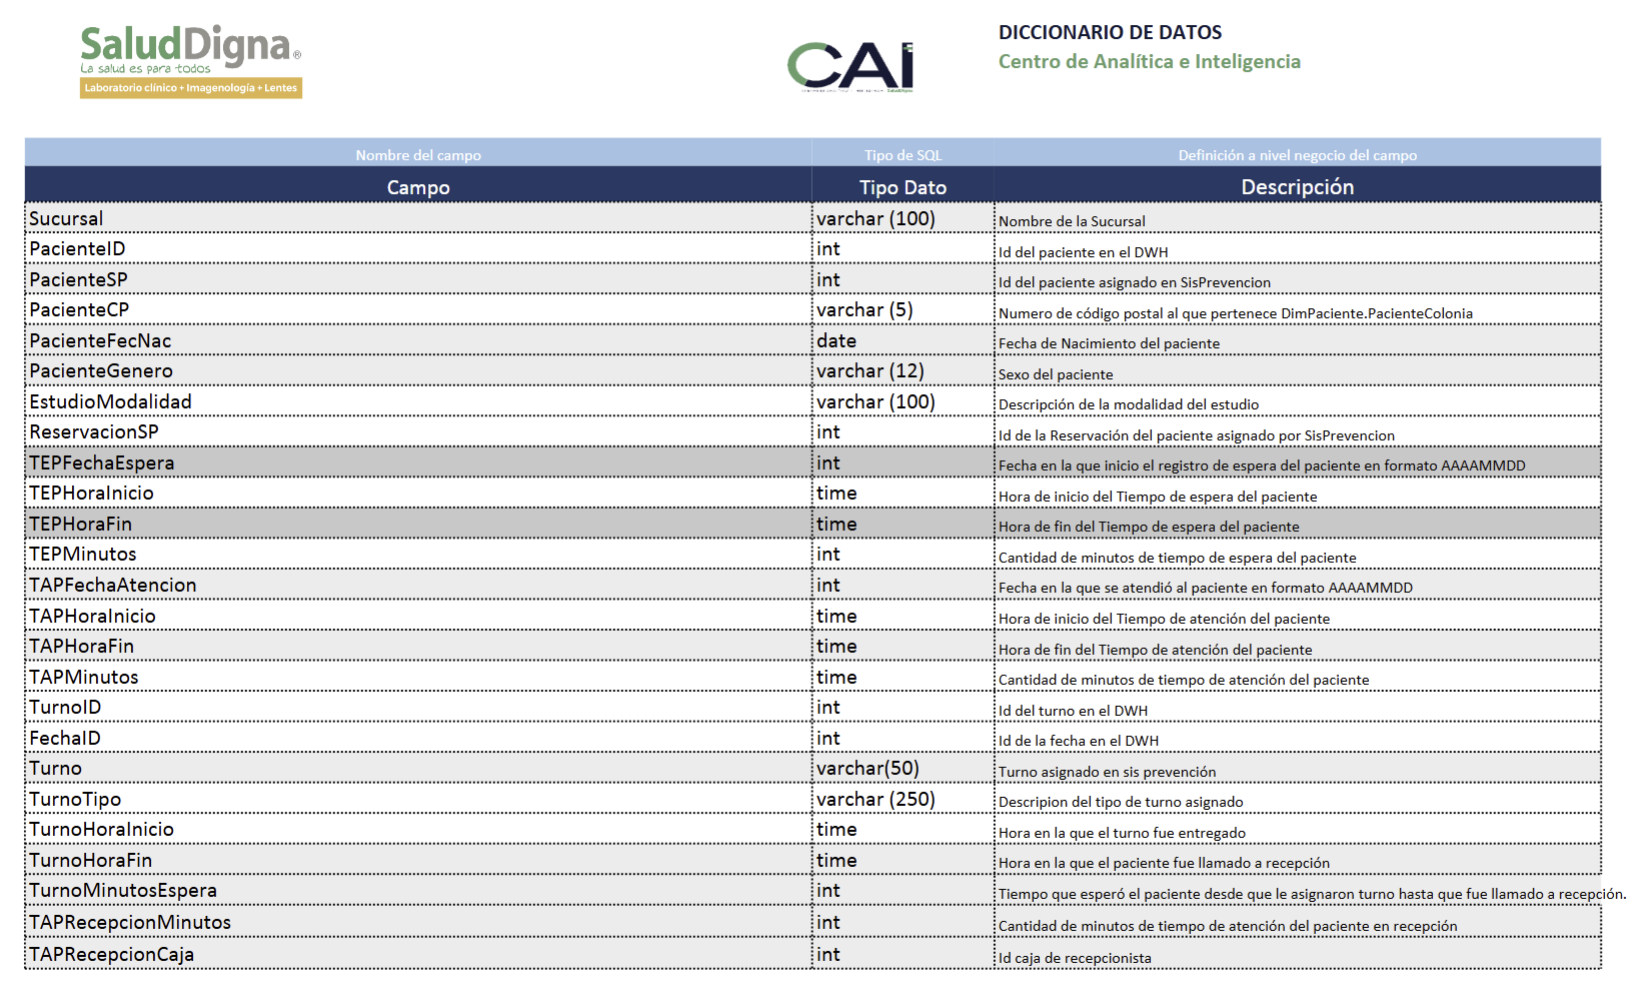

## 1.- Dataframe Turnos Pacientes

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

turnos_pacientes = pd.read_excel('Turnos Pacientes.xlsx')
print(turnos_pacientes.shape)
turnos_pacientes.head()

(85801, 16)


,Sucursal,FechaID,HoraLLegada,TurnoID,Turno,TurnoTipo,TurnoHoraInicio,TurnoHoraFin,TurnoMinutosEspera,TAPRecepcionMinutos,TAPRecepcionCaja,PacienteID,PacienteSP,PacienteGenero,PacienteFechaNacimiento,PacienteCodigoPostal
0,COYOACAN,20250301,6,65211357,N001,Solicitar Estudios,06:09:17,06:09:18,0.02,0.13,1222.0,NaN,NaN,NaN,NaT,NaN
1,COYOACAN,20250301,6,65211543,C001,Citado,06:12:36,06:13:04,0.47,5.55,2528.0,30863943.0,30782999.0,FEMENINO,1996-10-24,4100.0
2,COYOACAN,20250301,6,65211546,N002,Solicitar Estudios,06:12:23,06:13:06,0.72,8.78,1217.0,NaN,NaN,NaN,NaT,NaN
3,COYOACAN,20250301,6,65211556,N003,Solicitar Estudios,06:13:18,06:13:21,0.05,3.87,1220.0,64754478.0,48728583.0,FEMENINO,2000-03-01,4970.0
4,COYOACAN,20250301,6,65211622,N004,Solicitar Estudios,06:14:05,06:14:37,0.53,4.87,1222.0,45585478.0,8671551.0,FEMENINO,2003-06-22,10900.0


In [5]:
pd.isna(turnos_pacientes).sum()

Sucursal                       0
FechaID                        0
HoraLLegada                    0
TurnoID                        0
Turno                          0
TurnoTipo                      0
TurnoHoraInicio                0
TurnoHoraFin                   0
TurnoMinutosEspera             0
TAPRecepcionMinutos        13186
TAPRecepcionCaja           13186
PacienteID                 22516
PacienteSP                 22516
PacienteGenero             22516
PacienteFechaNacimiento    22516
PacienteCodigoPostal       24194
dtype: int64

## Nos interesan los generos de los pacientes, pero 1/4 parte del dataframe no cuenta con este valor y no se puede hacer inputación simple por media o mediana. Eliminamos el 25% de las filas?

In [7]:
#turnos_pacientes = turnos_pacientes.fillna(df.mean())
turnos_pacientes['PacienteGenero'].unique()

array([nan, 'FEMENINO', 'MASCULINO'], dtype=object)

In [39]:
df = turnos_pacientes.dropna(subset=['PacienteGenero'])
print(df.shape)
pd.isna(df).sum()

(63285, 16)


Sucursal                      0
FechaID                       0
HoraLLegada                   0
TurnoID                       0
Turno                         0
TurnoTipo                     0
TurnoHoraInicio               0
TurnoHoraFin                  0
TurnoMinutosEspera            0
TAPRecepcionMinutos        3215
TAPRecepcionCaja           3215
PacienteID                    0
PacienteSP                    0
PacienteGenero                0
PacienteFechaNacimiento       0
PacienteCodigoPostal       1678
dtype: int64

### Faltan alrededor de 3215 datos en TAP Recepción Minutos que es la cantidad de minutos de tiempo de atención del paciente en recepción. Haré inputación simple por media porque siento que es lo mejor

In [40]:
df['TAPRecepcionMinutos'] = df['TAPRecepcionMinutos'].fillna(df['TAPRecepcionMinutos'].mean())

C:\Users\jajp2\AppData\Local\Temp\ipykernel_16464\230357029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TAPRecepcionMinutos'] = df['TAPRecepcionMinutos'].fillna(df['TAPRecepcionMinutos'].mean())


In [41]:
pd.isna(df).sum()

Sucursal                      0
FechaID                       0
HoraLLegada                   0
TurnoID                       0
Turno                         0
TurnoTipo                     0
TurnoHoraInicio               0
TurnoHoraFin                  0
TurnoMinutosEspera            0
TAPRecepcionMinutos           0
TAPRecepcionCaja           3215
PacienteID                    0
PacienteSP                    0
PacienteGenero                0
PacienteFechaNacimiento       0
PacienteCodigoPostal       1678
dtype: int64

In [42]:
df.describe()

,FechaID,HoraLLegada,TurnoID,TurnoMinutosEspera,TAPRecepcionMinutos,TAPRecepcionCaja,PacienteID,PacienteSP,PacienteFechaNacimiento,PacienteCodigoPostal
count,6.328500e+04,63285.000000,6.328500e+04,63285.000000,63285.000000,60070.000000,6.328500e+04,6.328500e+04,63285,61607.000000
mean,2.025032e+07,9.567544,6.633513e+07,3.738003,4.298526,2567.045630,4.104382e+07,1.970613e+07,1979-01-31 19:31:43.673856320,53997.022319
min,2.025030e+07,5.000000,6.521154e+07,0.000000,0.020000,1134.000000,9.888412e+06,3.150000e+02,1924-06-14 00:00:00,0.000000
25%,2.025031e+07,7.000000,6.577557e+07,0.130000,2.870000,1214.000000,3.254140e+07,3.540799e+06,1963-02-28 00:00:00,4970.000000
50%,2.025032e+07,9.000000,6.633465e+07,1.420000,3.920000,1222.000000,3.934851e+07,1.686074e+07,1978-11-03 00:00:00,80090.000000
75%,2.025032e+07,11.000000,6.688773e+07,5.400000,5.050000,3759.000000,4.998435e+07,3.315721e+07,1995-05-15 00:00:00,80200.000000
max,2.025033e+07,21.000000,6.746259e+07,179.720000,250.700000,9277.000000,6.570036e+07,4.971821e+07,2025-03-04 00:00:00,98040.000000
std,8.971590e+00,2.921179,6.505425e+05,5.440814,3.424824,1923.923269,1.305018e+07,1.630008e+07,NaN,35295.972989


- Máximo de tiempo que esperó el paciente desde que le asignaron turno hasta que fue llamado a recepción (TAPMinutosEspera): 180 minutos o 3 hrs. Nada ideal pero realista, no deberíamos de quitarlo

- Máximo de TAPRecepcionMinutos (la cantidad de minutos de tiempo de atención del paciente en recepción): 250 minutos o 4 hrs. Me hace sentido porque es la suma de la variable anterior y el tiempo que tardo en la recepción, entonces siempre tiene que ser mayor que TAPMinutosEspera. Solo que no se si es normal que dures 1 hr en recepción, a menos que el sistema haya fallado y tuvieran que esperar y el tiempo siguiera corriendo.

- TAPRecepcionCaja es el id de la caja de recepcionista, ósea no importa.

In [43]:
df['TiempoMinutosCaja'] = df['TAPRecepcionMinutos']-df['TurnoMinutosEspera']
print(df.shape)
pd.isna(df).sum()

(63285, 17)


C:\Users\jajp2\AppData\Local\Temp\ipykernel_16464\1352605267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TiempoMinutosCaja'] = df['TAPRecepcionMinutos']-df['TurnoMinutosEspera']


Sucursal                      0
FechaID                       0
HoraLLegada                   0
TurnoID                       0
Turno                         0
TurnoTipo                     0
TurnoHoraInicio               0
TurnoHoraFin                  0
TurnoMinutosEspera            0
TAPRecepcionMinutos           0
TAPRecepcionCaja           3215
PacienteID                    0
PacienteSP                    0
PacienteGenero                0
PacienteFechaNacimiento       0
PacienteCodigoPostal       1678
TiempoMinutosCaja             0
dtype: int64

In [49]:
hoy = pd.Timestamp.today()
df['PacienteEdad'] = (hoy - df['PacienteFechaNacimiento']) // pd.Timedelta(days=365.25)
df['PacienteEdad'] = df['PacienteEdad'].astype(int)

C:\Users\jajp2\AppData\Local\Temp\ipykernel_16464\3368950108.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PacienteEdad'] = (hoy - df['PacienteFechaNacimiento']) // pd.Timedelta(days=365.25)
C:\Users\jajp2\AppData\Local\Temp\ipykernel_16464\3368950108.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PacienteEdad'] = df['PacienteEdad'].astype(int)


In [50]:
df.describe()

,FechaID,HoraLLegada,TurnoID,TurnoMinutosEspera,TAPRecepcionMinutos,TAPRecepcionCaja,PacienteID,PacienteSP,PacienteFechaNacimiento,PacienteCodigoPostal,TiempoMinutosCaja,PacienteEdad
count,6.328500e+04,63285.000000,6.328500e+04,63285.000000,63285.000000,60070.000000,6.328500e+04,6.328500e+04,63285,61607.000000,63285.000000,63285.000000
mean,2.025032e+07,9.567544,6.633513e+07,3.738003,4.298526,2567.045630,4.104382e+07,1.970613e+07,1979-01-31 19:31:43.673856320,53997.022319,0.560523,45.777341
min,2.025030e+07,5.000000,6.521154e+07,0.000000,0.020000,1134.000000,9.888412e+06,3.150000e+02,1924-06-14 00:00:00,0.000000,-172.820000,0.000000
25%,2.025031e+07,7.000000,6.577557e+07,0.130000,2.870000,1214.000000,3.254140e+07,3.540799e+06,1963-02-28 00:00:00,4970.000000,-1.420000,30.000000
50%,2.025032e+07,9.000000,6.633465e+07,1.420000,3.920000,1222.000000,3.934851e+07,1.686074e+07,1978-11-03 00:00:00,80090.000000,2.000000,46.000000
75%,2.025032e+07,11.000000,6.688773e+07,5.400000,5.050000,3759.000000,4.998435e+07,3.315721e+07,1995-05-15 00:00:00,80200.000000,3.800000,62.000000
max,2.025033e+07,21.000000,6.746259e+07,179.720000,250.700000,9277.000000,6.570036e+07,4.971821e+07,2025-03-04 00:00:00,98040.000000,250.680000,100.000000
std,8.971590e+00,2.921179,6.505425e+05,5.440814,3.424824,1923.923269,1.305018e+07,1.630008e+07,NaN,35295.972989,6.427447,19.899935


In [51]:
df.head(3)

,Sucursal,FechaID,HoraLLegada,TurnoID,Turno,TurnoTipo,TurnoHoraInicio,TurnoHoraFin,TurnoMinutosEspera,TAPRecepcionMinutos,TAPRecepcionCaja,PacienteID,PacienteSP,PacienteGenero,PacienteFechaNacimiento,PacienteCodigoPostal,TiempoMinutosCaja,PacienteEdad
1,COYOACAN,20250301,6,65211543,C001,Citado,06:12:36,06:13:04,0.47,5.55,2528.0,30863943.0,30782999.0,FEMENINO,1996-10-24,4100.0,5.08,28
3,COYOACAN,20250301,6,65211556,N003,Solicitar Estudios,06:13:18,06:13:21,0.05,3.87,1220.0,64754478.0,48728583.0,FEMENINO,2000-03-01,4970.0,3.82,25
4,COYOACAN,20250301,6,65211622,N004,Solicitar Estudios,06:14:05,06:14:37,0.53,4.87,1222.0,45585478.0,8671551.0,FEMENINO,2003-06-22,10900.0,4.34,21


## 2. Dataframe Tiempo Pacientes

In [2]:
tiempos_pacientes = pd.read_excel('Tiempos Pacientes.xlsx')
print(tiempos_pacientes.shape)
tiempos_pacientes.head()

(109164, 16)


,Sucursal,EstudioModalidad,ReservacionSP,TEPFechaEspera,TEPHoraInicio,TEPHoraFin,TEPMinutos,TAPFechaAtencion,TAPHoraInicio,TAPHoraFin,TAPMinutos,PacienteID,PacienteSP,PacienteGenero,PacienteFechaNacimiento,PacienteCodigoPostal
0,COYOACAN,DENSITOMETRIA,806115606,20250302,2025-03-02 13:20:00.000,2025-03-02 11:40:15.113,0.00,20250302,2025-03-02 11:40:15.113,2025-03-02 11:47:18.170,7.05,17256328.0,17520850.0,FEMENINO,1971-07-24,4310.0
1,COYOACAN,DENSITOMETRIA,918870299,20250329,2025-03-29 07:11:15.770,2025-03-29 07:39:49.400,28.57,20250329,2025-03-29 07:39:49.400,2025-03-29 07:45:18.230,5.48,46138407.0,9225063.0,FEMENINO,1967-02-08,3570.0
2,COYOACAN,DENSITOMETRIA,921436045,20250321,2025-03-21 15:55:53.723,2025-03-21 16:15:07.230,19.23,20250321,2025-03-21 16:15:07.230,2025-03-21 16:21:50.127,6.72,41262646.0,4138508.0,FEMENINO,1948-09-23,3240.0
3,COYOACAN,DENSITOMETRIA,923595474,20250301,2025-03-01 08:03:01.360,2025-03-01 09:42:16.990,99.25,20250301,2025-03-01 09:42:16.990,2025-03-01 09:48:03.577,5.78,48597444.0,11686051.0,FEMENINO,1976-04-07,1410.0
4,COYOACAN,DENSITOMETRIA,926170090,20250302,2025-03-02 09:40:00.000,2025-03-02 09:20:46.240,0.00,20250302,2025-03-02 09:20:46.240,2025-03-02 09:27:47.617,7.02,63749589.0,47710075.0,FEMENINO,1978-12-28,4380.0


In [4]:
pd.isna(tiempos_pacientes).sum()

Sucursal                       0
EstudioModalidad               0
ReservacionSP                  0
TEPFechaEspera                 0
TEPHoraInicio                233
TEPHoraFin                  1612
TEPMinutos                     0
TAPFechaAtencion               0
TAPHoraInicio               1614
TAPHoraFin                  1451
TAPMinutos                  3065
PacienteID                 14508
PacienteSP                 14508
PacienteGenero             14508
PacienteFechaNacimiento    14508
PacienteCodigoPostal       17475
dtype: int64